# EDA

In [ ]:
# Import thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.arima.model import ARIMA # statsmodels==0.14.0

from pmdarima.arima import auto_arima

In [ ]:
#%%
df= pd.read_excel('/content/PNJ_2014_2024.xlsx', index_col='Ngày', parse_dates=True)
df = df.reset_index(drop=True)


In [ ]:
df = pd.read_excel('PNJ_2014_2024.xlsx', index_col='Ngày', parse_dates=True)
# Đảo ngược dữ liệu để có dữ liệu từ 2014 đến 2024
df = df[::-1]  # Đảo ngược dữ liệu

In [ ]:
#%% Xem thông tin cơ bản của dữ liệu
print(df.info())  # Kiểm tra các kiểu dữ liệu và giá trị null
print(df.describe())  # Thống kê mô tả các cột số

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2743 entries, 2014-01-02 to 2024-12-31
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Giá mở cửa     2743 non-null   float64
 1   Giá cao nhất   2743 non-null   float64
 2   Giá thấp nhất  2743 non-null   float64
 3   Giá đóng cửa   2743 non-null   float64
 4   Khối lượng     2743 non-null   object 
dtypes: float64(4), object(1)
memory usage: 128.6+ KB
None
        Giá mở cửa  Giá cao nhất  Giá thấp nhất  Giá đóng cửa
count  2743.000000   2743.000000    2743.000000   2743.000000
mean     81.054138     82.071382      80.032519     81.104521
std      31.042497     31.492801      30.577608     31.029374
min      27.700000     29.000000      27.700000     28.100000
25%      60.350000     61.000000      59.600000     60.400000
50%      82.900000     83.700000      81.900000     82.800000
75%      98.350000     99.500000      97.200000     98.350000
max     208.0

In [ ]:
#%% Kiểm tra các giá trị bị thiếu
print(df.isnull().sum())

Giá mở cửa       0
Giá cao nhất     0
Giá thấp nhất    0
Giá đóng cửa     0
Khối lượng       0
dtype: int64


In [ ]:
#%% Kiểm tra các cột dữ liệu
print(df.columns)

Index(['Giá mở cửa', 'Giá cao nhất', 'Giá thấp nhất', 'Giá đóng cửa',
       'Khối lượng'],
      dtype='object')


In [ ]:
#%%
# Xử lý cột 'Khối lượng' bằng cách loại bỏ dấu phẩy và chuyển sang kiểu float
df['Khối lượng'] = df['Khối lượng'].replace({',': ''}, regex=True).astype(float)

# Kiểm tra lại dữ liệu
print(df[['Khối lượng']].head())

            Khối lượng
Ngày                  
2014-01-02      5980.0
2014-01-03      4280.0
2014-01-06     16720.0
2014-01-07      7010.0
2014-01-08     10540.0


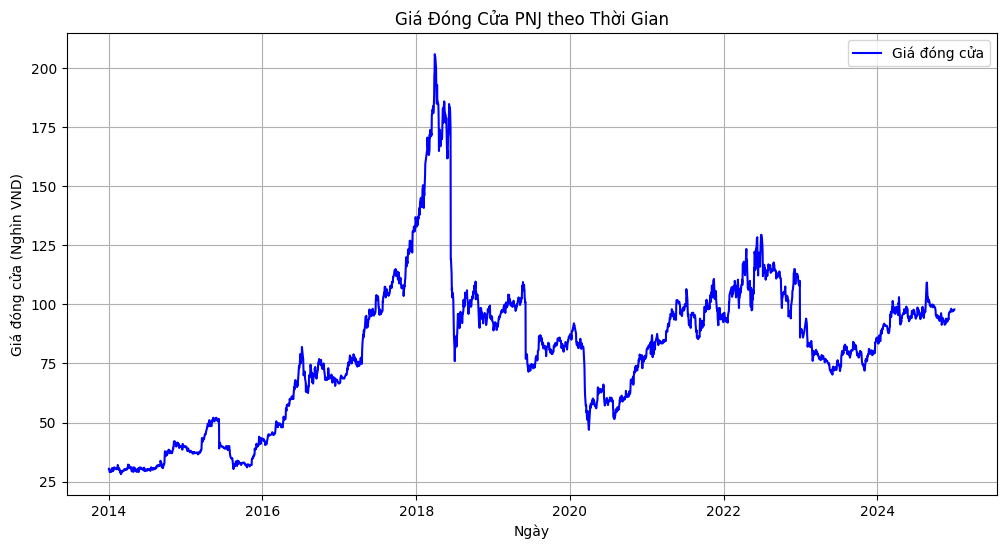

In [ ]:
#%% Trực quan hóa giá đóng cửa theo thời gian
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Giá đóng cửa'], label='Giá đóng cửa', color='b')
plt.title('Giá Đóng Cửa PNJ theo Thời Gian')
plt.xlabel('Ngày')
plt.ylabel('Giá đóng cửa (Nghìn VND)')
plt.grid(True)
plt.legend()
plt.show()

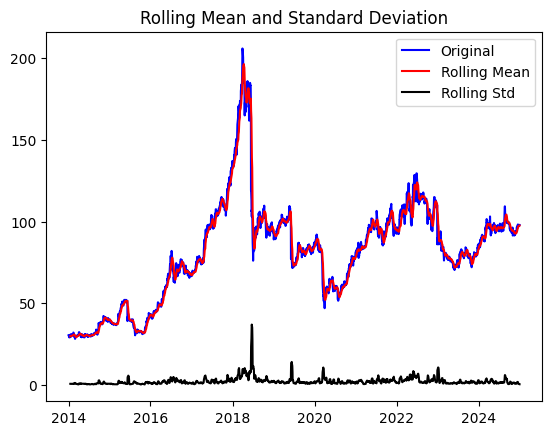

In [ ]:
#%%
# Tính trung bình động 12 kỳ
rolmean = df['Giá đóng cửa'].rolling(12).mean()

# Tính độ lệch chuẩn 12 kỳ
rolstd = df['Giá đóng cửa'].rolling(12).std()
plt.plot(df['Giá đóng cửa'], color='blue', label='Original')
plt.plot(rolmean, color='red', label='Rolling Mean')
plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend()
plt.title('Rolling Mean and Standard Deviation')
plt.show()

<Figure size 1200x800 with 0 Axes>

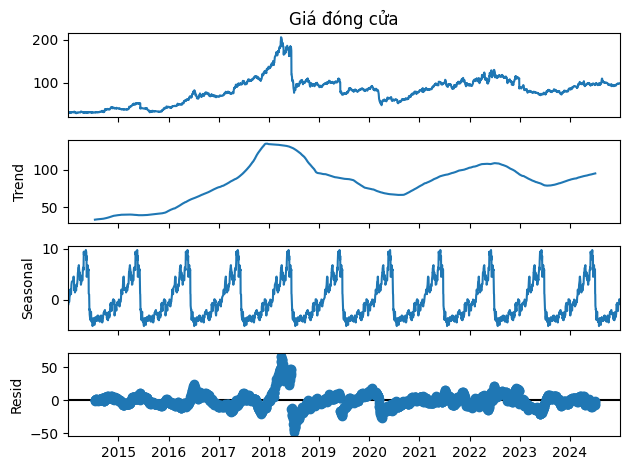

In [ ]:
#%% Phân rã chuỗi thời gian
decomposition = seasonal_decompose(df['Giá đóng cửa'], model='additive', period=252)

# Vẽ kết quả phân rã
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()

# Holt-winter


In [ ]:
#%%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

#%% Đọc dữ liệu từ file Excel
df = pd.read_excel('PNJ_2014_2024.xlsx', index_col='Ngày', parse_dates=True)

# Đảo ngược dữ liệu để có dữ liệu từ 2014 đến 2024
df = df[::-1]  # Đảo ngược dữ liệu


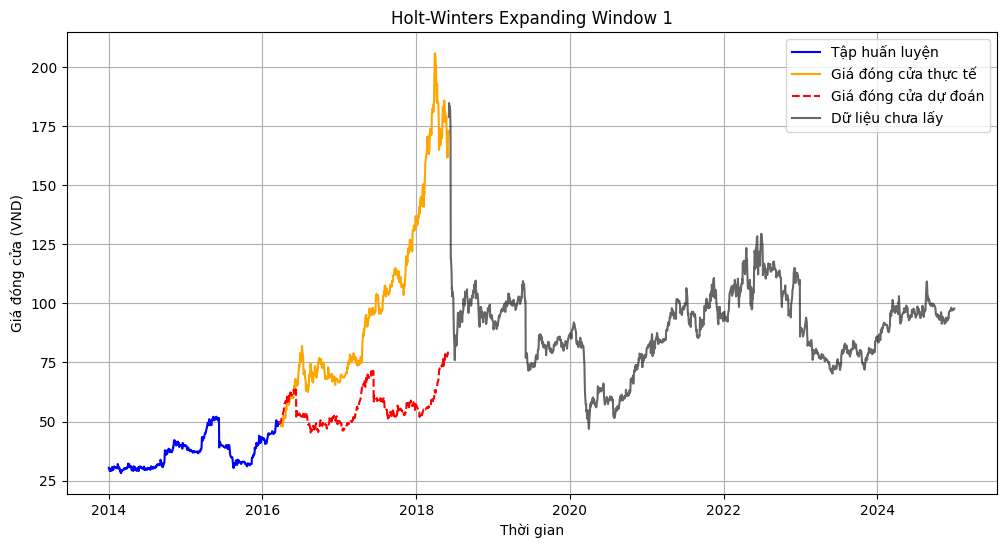

Window 1 - MSE: 3074.37, RMSE: 55.45, - MAE: 43.42


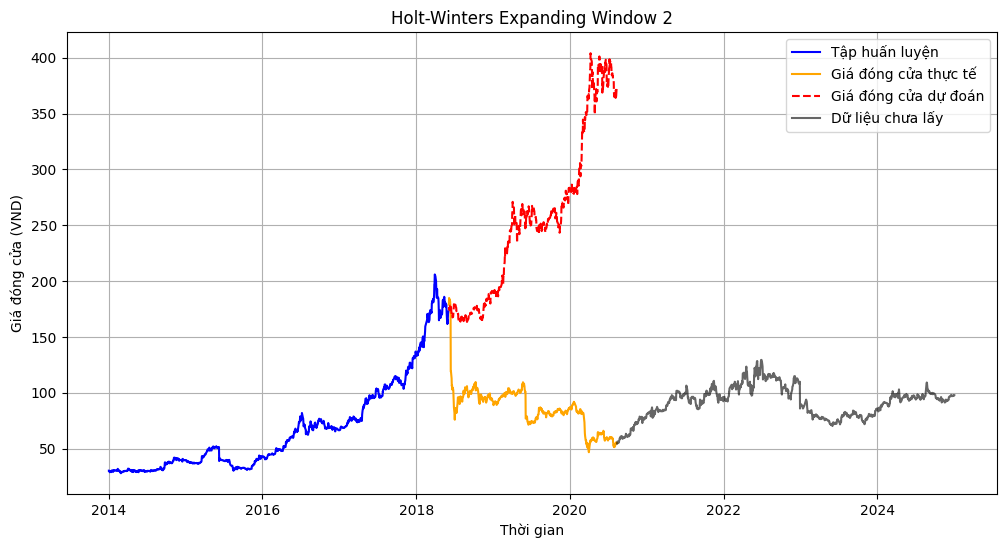

Window 2 - MSE: 37175.92, RMSE: 192.81, - MAE: 171.69


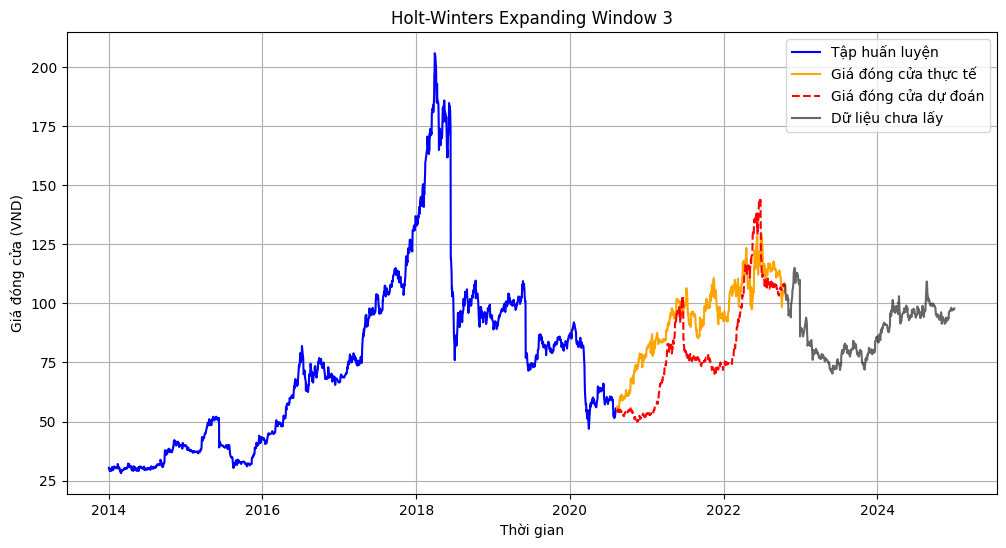

Window 3 - MSE: 324.67, RMSE: 18.02, - MAE: 15.60


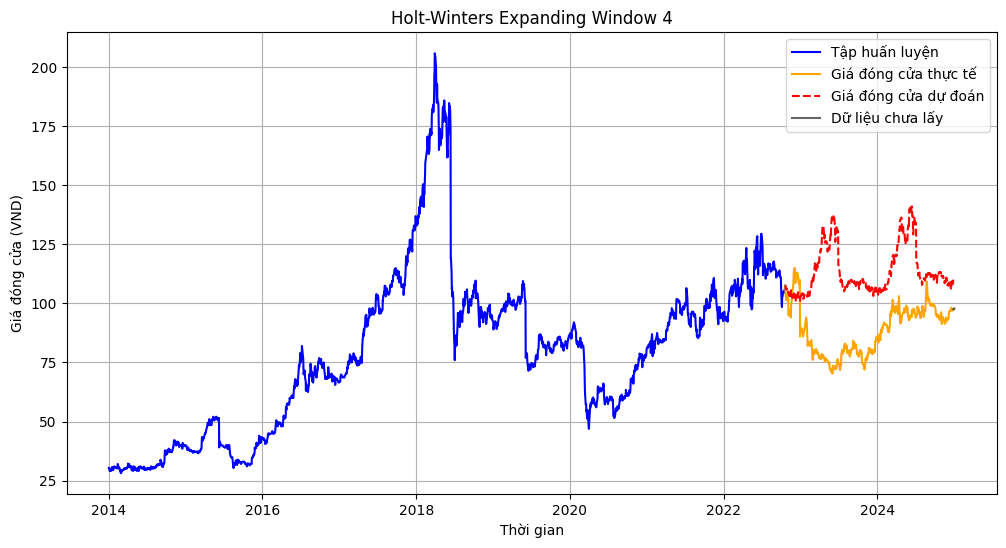

Window 4 - MSE: 863.07, RMSE: 29.38, - MAE: 25.69


In [ ]:
#%% Số lượng cửa sổ huấn luyện (5 cửa sổ)
n_splits = 5

# Lưu kết quả dự báo của từng lần chạy
results = []

# Tạo danh sách để lưu các tham số của mô hình
model_parameters = []

# Chia dữ liệu thành 5 phần bằng nhau
split_size = len(df) // n_splits

# Lặp qua từng cửa sổ huấn luyện
for i in range(1, n_splits ):
    # **Dữ liệu huấn luyện**: Bao gồm i phần đầu tiên
    train_data = df.iloc[:split_size * i]

    # **Dữ liệu kiểm tra**
    test_data = df.iloc[split_size * i: split_size * (i + 1)]

    # Huấn luyện mô hình Holt-Winters
    model = ExponentialSmoothing(train_data['Giá đóng cửa'], trend='mul', seasonal='mul', seasonal_periods=252)
    model_fit = model.fit()

    # Dự báo cho toàn bộ tập kiểm tra
    forecast = model_fit.forecast(steps=len(test_data))

    # Lưu kết quả
    results.append((test_data.index, test_data['Giá đóng cửa'], forecast))
    # **Vẽ biểu đồ cho từng cửa sổ**
    plt.figure(figsize=(12, 6))

    # **Tập huấn luyện** (màu xanh)
    plt.plot(train_data.index, train_data['Giá đóng cửa'], label='Tập huấn luyện', color='blue')

    # **Giá đóng cửa thực tế** (màu cam)
    plt.plot(test_data.index, test_data['Giá đóng cửa'], label='Giá đóng cửa thực tế', color='orange')

    # **Giá đóng cửa dự đoán** (màu đỏ)
    plt.plot(test_data.index, forecast, label='Giá đóng cửa dự đoán', color='red', linestyle='--')

    # **Dữ liệu chưa lấy (màu đen)**
    if i < n_splits:
        plt.plot(df.index[split_size * (i + 1):], df['Giá đóng cửa'][split_size * (i + 1):], label='Dữ liệu chưa lấy',
                 color='black', linestyle='-', alpha=0.6)

    plt.legend()
    plt.title(f'Holt-Winters Expanding Window {i}')
    plt.xlabel('Thời gian')
    plt.ylabel('Giá đóng cửa (VND)')
    plt.grid(True)
    plt.show()

    # **Đánh giá mô hình cho từng cửa sổ**
    mae = mean_absolute_error(test_data['Giá đóng cửa'], forecast)
    rmse = np.sqrt(mean_squared_error(test_data['Giá đóng cửa'], forecast))
    mse = mean_squared_error(test_data['Giá đóng cửa'], forecast)  # Tính MSE
    print(f"Window {i} - MSE: {mse:.2f}, RMSE: {rmse:.2f}, - MAE: {mae:.2f}")



In [ ]:
#%%
# Tạo bảng kết quả chi tiết
model_parameters_df = pd.DataFrame(model_parameters)

# Hiển thị bảng kết quả
print(model_parameters_df)

Empty DataFrame
Columns: []
Index: []
